In [1]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import pandas as pd
import statsmodels.stats.multitest as multi

In [2]:
#Let's do Fisher's and t-test on float values 
size_of_control=20
size_of_treated=20
#Let's create two samples from two normal distributions
control=np.random.normal(5.0, 0.5, size_of_control)
treated=np.random.normal(5.1,0.2,size_of_treated)

ttest=stats.ttest_ind(control, treated, equal_var=False, alternative='less')
fisher=stats.ttest_ind(control, treated, equal_var=False, permutations=1000, alternative='less')
print('The t-test gives p-value:',ttest[1])
print('The Fisher test gives p-value:',fisher[1])

#Our Fisher test
observed_difference=treated.mean()-control.mean()
all_together=np.concatenate((treated,control),axis=0)
number_of_splits=1000
differences=np.zeros(number_of_splits)
all_copy=all_together
for i in range(number_of_splits):
    np.random.shuffle(all_copy) #Shuffle it
    fake_treated=all_copy[:len(treated)]
    fake_control=all_copy[len(treated):]
    differences[i]=fake_treated.mean()-fake_control.mean()
    
p_value = np.sum(differences >= observed_difference)/differences.size

print('Our Fisher test gives p-value:',p_value)

The t-test gives p-value: 0.5035713604807852
The Fisher test gives p-value: 0.52
Our Fisher test gives p-value: 0.504


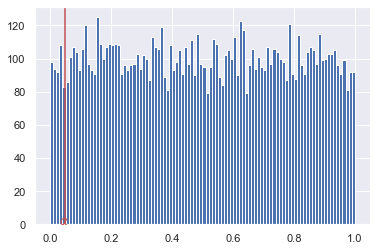

In [3]:
#Let's do this for many tests
#First we will do identical distributions

size_of_control=20
size_of_treated=20
number_of_tests=10000
#Let's create two samples from two normal distributions
control=np.random.normal(5.0, 0.5, size=(size_of_control,number_of_tests))
treated=np.random.normal(5.0,0.5,size=(size_of_treated,number_of_tests))

ttest=stats.ttest_ind(control, treated, equal_var=True, alternative='less')
    

p_values_h0=ttest[1]
plt.hist(p_values_h0,bins=100)
plt.text(0.03,-0.05,r"$\alpha$",color='r')
plt.axvline(x=0.05,color='r')
plt.show()


### We see that each p-value is equaly present
If we choose an alpha, we will make type I errors, like it or not. 

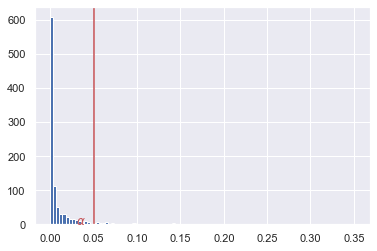

In [30]:
#Now let's sample from two different distributions.
size_of_control=20
size_of_treated=20
number_of_tests=1000
#Let's create two samples from two normal distributions
control=np.random.normal(5.0, 0.5, size=(size_of_control,number_of_tests))
treated=np.random.normal(5.5,0.5,size=(size_of_treated,number_of_tests))

ttest=stats.ttest_ind(control, treated, equal_var=True, alternative='less')
    

p_values_h1=ttest[1]
plt.hist(p_values_h1,bins=100)
plt.text(0.03,-0.2,r"$\alpha$",color='r')
plt.axvline(x=0.05,color='r')
plt.show()

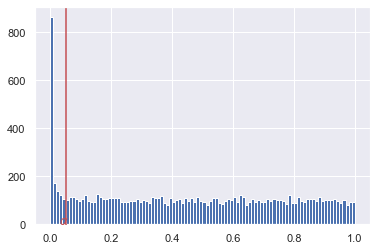

In [31]:
#Let's put them together
p_values=np.concatenate((p_values_h0,p_values_h1))

plt.hist(p_values,bins=100)
plt.text(0.03,-0.2,r"$\alpha$",color='r')
plt.axvline(x=0.05,color='r')
plt.show()

So at the left extreme, I have 850 positive tests. But about 100 are actually false positives. The real number is about 750-800. 

### Multiple measurements on the same samples

Example: We measure hemoglobin, cholesterol, glucose etc. on the treated and control group.

The values could for example be gene expression.  

In [6]:
### Let's simulate multiple hypothesis, lets generate an example of gene expression

number_of_genes=5
size_of_control=20
control_means=np.random.normal(5.0,0.2,size=number_of_genes)
control_stds=np.abs(np.random.normal(0.2,0.2,size=number_of_genes))
control=np.random.normal(loc=control_means, scale=control_stds,size=(size_of_control,number_of_genes))

treated_means=np.random.normal(5.0,0.3,size=number_of_genes)
treated_stds=np.abs(np.random.normal(0.2,0.3,size=number_of_genes))
treated=np.random.normal(loc=treated_means, scale=treated_stds,size=(size_of_control,number_of_genes))

#Let's see how the data looks like

df1=pd.DataFrame(control,columns=['gene1','gene2','gene3','gene4','gene5'])
df1.index.name = 'patient'
df1['treatment']='control'

df2=pd.DataFrame(treated,columns=['gene1','gene2','gene3','gene4','gene5'])
df2.index.name = 'patient'
df2['treatment']='treated'

df=pd.concat([df1,df2])
df
#df1
#df2

,gene1,gene2,gene3,gene4,gene5,treatment
patient,,,,,,
0,5.135747,4.574859,5.290356,4.724346,5.051023,control
1,4.956388,5.190194,5.027048,4.463917,4.698196,control
2,5.246852,4.844147,5.479805,6.110921,5.322142,control
3,5.180040,5.152718,4.778858,5.517609,4.359892,control
4,5.009756,4.640056,4.707260,5.404002,4.391803,control
5,4.991570,5.679598,4.919397,5.543786,4.723866,control
6,5.384919,4.792451,5.425145,5.221994,5.495045,control
7,5.285325,5.543039,6.008373,4.934846,4.859366,control
8,5.250171,5.294090,4.623296,6.585688,5.511196,control


In [7]:
#Let's calculate the p-values for each gene. Let's for example use the t-test.
ttest=stats.ttest_ind(control, treated, equal_var=False, alternative='less')
p_values=ttest[1]
p_values

array([1.00000000e+00, 5.45743624e-03, 4.49882112e-02, 9.99999367e-01,
       1.01096635e-05])

In [8]:
df_p=pd.DataFrame(np.transpose(p_values),columns=['p-value'],index=['gene1','gene2','gene3','gene4','gene5'])
print('The p-values for the genes are:')
df_p

The p-values for the genes are:


,p-value
gene1,1.000000
gene2,0.005457
gene3,0.044988
gene4,0.999999
gene5,0.000010


In [9]:
#Let's do now the example from above, with no effect at all, for five genes.

number_of_genes=5
size_of_control=20

control=np.random.normal(loc=5.0, scale=0.5,size=(size_of_control,number_of_genes))
treated=np.random.normal(loc=5.0, scale=0.5,size=(size_of_control,number_of_genes))

ttest=stats.ttest_ind(control, treated, equal_var=False, alternative='less')
p_values=ttest[1]
np.transpose(p_values)
df_p=pd.DataFrame(np.transpose(p_values),columns=['p-value'],index=['gene1','gene2','gene3','gene4','gene5'])
print('The p-values for the genes are:')
df_p


The p-values for the genes are:


,p-value
gene1,0.849928
gene2,0.545697
gene3,0.590070
gene4,0.652829
gene5,0.380349


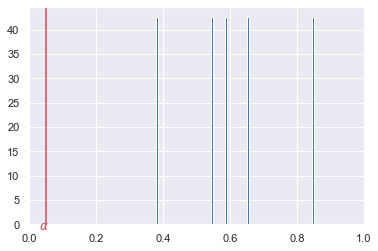

In [10]:
plt.hist(p_values,bins=100,density=True)
plt.axvline(x=0.05,color='r')
plt.text(0.03,-1,r"$\alpha$",color='r')
plt.xlim([0,1])
plt.show()

In [11]:
#But now, let's do this for a large number of genes

#Let's do now the example from above, with no effect at all, for five genes.

number_of_genes=100
size_of_control=20

control=np.random.normal(loc=5.0, scale=0.5,size=(size_of_control,number_of_genes))
treated=np.random.normal(loc=5.0, scale=0.5,size=(size_of_control,number_of_genes))

ttest=stats.ttest_ind(control, treated, equal_var=False, alternative='less')
p_values=ttest[1]
np.transpose(p_values)
df_p=pd.DataFrame(np.transpose(p_values),columns=['p-value'])
print('The p-values for the genes are:')
df_p


The p-values for the genes are:


,p-value
0,0.994578
1,0.245718
2,0.823605
3,0.830547
4,0.597360
...,...
95,0.710029
96,0.342299
97,0.062043
98,0.580727


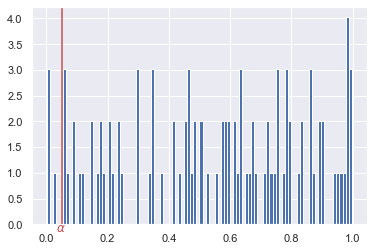

In [12]:
plt.hist(p_values,bins=100,density=True)
plt.axvline(x=0.05,color='r')
plt.text(0.03,-0.15,r"$\alpha$",color='r')
plt.show()

### Does this mean there are some genes that have significantly different expression? 
No, not really. This is simply a $\bf{False\ Discovery\ Rate\ (FDR)}$ because we have many measurements.

The probability that we get a result at random now is quite large. 


How do we deal with this. We need to correct $\alpha$ for the fact that we have many measurements. 

The simplest solution is the $\bf{Boniferroni\ correction}$.

Simply divide $\alpha$ with the number of genes, of measurements. 

In other words, if your probability of a positive is 10%, you need at least 10 trials to get a positive. 
If you try 100 trials, you will get 10 positives. To get rid of these 10, you need to lower the probability to less than 1%. 

Remember that all of the true positives, for a test with large power, have very low p-values. They are all squeezed to the left.
So even if you divide by 100, you will capture them. In case of smaller differences, lower power, you will miss some true positives. We will use different method then.

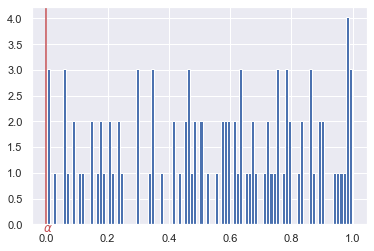

The corrected significant p-values are: []
The significantly different expressed genes are: []


In [13]:
plt.hist(p_values,bins=100,density=True)
plt.axvline(x=0.05/number_of_genes,color='r')
plt.text(-0.01,-0.15,r"$\alpha$",color='r')
plt.show()

#print(p_values[:]<0.05/number_of_genes)
print("The corrected significant p-values are:",p_values[p_values[:]<0.05/number_of_genes])
print("The significantly different expressed genes are:",np.argwhere(p_values<0.05/number_of_genes))

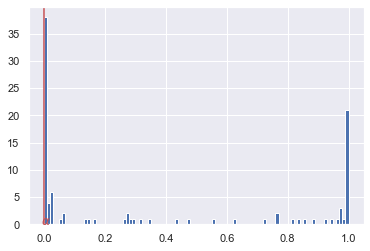

The corrected significant p-values are: [4.69336902e-05 1.13087582e-05 8.95958606e-07 1.67012269e-07
 4.05834307e-05 3.81459582e-06 1.75075514e-10 4.18222025e-05
 9.82798186e-05 1.49225616e-06 2.19162551e-10 9.61340280e-06
 3.15620083e-07 8.03513215e-07 1.38728600e-05 3.67027833e-05
 4.82061183e-06 3.46574604e-10 3.54903830e-05 3.01369917e-04
 2.03805367e-07 1.93524068e-11 1.88808022e-06 8.07369555e-05
 1.23752722e-06]
The significantly different expressed genes are: [[ 0]
 [12]
 [13]
 [18]
 [20]
 [29]
 [33]
 [35]
 [39]
 [41]
 [42]
 [44]
 [45]
 [46]
 [48]
 [50]
 [54]
 [55]
 [56]
 [62]
 [70]
 [78]
 [90]
 [93]
 [95]]
The number of findings is: 25


In [14]:
#How about the case when we do have some of the genes really different. 
size_of_control=20
number_of_genes=100
control_means=np.random.normal(5.0,0.2,size=number_of_genes)
control_stds=np.abs(np.random.normal(0.2,0.2,size=number_of_genes))
control=np.random.normal(loc=control_means, scale=control_stds,size=(size_of_control,number_of_genes))

treated_means=np.random.normal(5.1,0.2,size=number_of_genes)
treated_stds=np.abs(np.random.normal(0.2,0.2,size=number_of_genes))
treated=np.random.normal(loc=treated_means, scale=treated_stds,size=(size_of_control,number_of_genes))



ttest=stats.ttest_ind(control, treated, equal_var=False, alternative='less')
p_values=ttest[1]

plt.hist(p_values,bins=100,density=True)
plt.axvline(x=0.05/number_of_genes,color='r')
plt.text(-0.01,-0.15,r"$\alpha$",color='r')
plt.show()

print("The corrected significant p-values are:",p_values[p_values[:]<0.05/number_of_genes])
print("The significantly different expressed genes are:",np.argwhere(p_values<0.05/number_of_genes))
print("The number of findings is:",np.sum(p_values<0.05/number_of_genes))

#### Another way to say this:

Here we are not answering the question if a single hypothesis is correct or not. 

Here we are answering an equivalent of what is the probability that many hypothesis are correct at the same time. 

Those are two different questions. 

As if we were performing many tests of the same hypothesis. 

##### Boniferroni is quite conservative. It underestimates the p-values. 

Another, more accurate method is:

## Benjamini–Hochberg procedure

Let's go back to the histogram with p-values for a moment. 

In the BH procedure, we modify the False Discovery Rate. 

We want to get the 750 true positives, out of the 850 total. 

We just get the lowest 750 p-values. But how to know how many to get?
We will have to include false positives. How do we minimize the FPs and keep 
the FDR below $\alpha$?


First we order the p-values. 

Then we multiply them $p_k\frac{m}{k}$, where $m$ is the number of genes (measurements)
and $k$ is the rank number. 

Then we declare significant all where $p_k\frac{m}{k}<\alpha$. 

This is equivalent to $p_k<\alpha\frac{k}{m}$.

Note that if we multiply Boniferroni's $\frac{\alpha}{m}$ with $k$.

In a way, different p-values are treated with a different Boniferroni's correction. 

This is equivalent to plotting $p_k$ vs. $k$ and taking all that lie under the line with slope $\frac{\alpha}{m}$.

In [15]:
#We will use the same p-values as the cell above.

indices_ordered_pvalues=np.argsort(p_values)
indices_ordered_pvalues
#p_values[indices_ordered_pvalues]

array([78, 33, 42, 55, 18, 70, 45, 46, 13, 95, 41, 90, 29, 54, 44, 12, 48,
       56, 50, 20, 35,  0, 93, 39, 62, 23, 76, 71, 25, 40, 49, 77, 19, 86,
        9,  3, 30, 34, 73, 10, 97, 38, 64,  2, 82, 36, 80, 85, 69, 98, 47,
       26, 17, 57, 92,  6,  4, 83, 89, 79,  8, 61, 51, 43, 15, 59, 75, 27,
       72, 67, 96, 21, 31, 74, 22,  7, 88,  5, 53, 94, 66, 24, 11, 16, 65,
       87, 91, 52, 99, 60, 68, 14, 37,  1, 32, 58, 84, 81, 28, 63],
      dtype=int64)

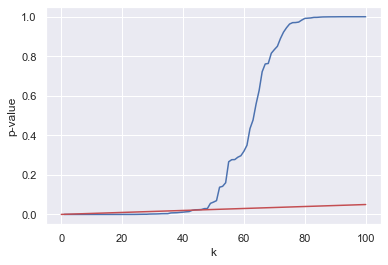

In [16]:
#Let's do the alpha/m vs P plot

plt.plot(range(1,101),p_values[indices_ordered_pvalues])
plt.xlabel('k')
plt.ylabel('p-value')
x=np.linspace(0,100,100)
y=0.05*x/100
plt.plot(x,y,color='r')

We will declare as significant all genes with p-values below the red line. 

### To find the significant genes, we calculate the q-values:

$q_k=p_k\frac{m}{k}$

The genes with $q_k\leq\alpha$ are the significant ones.

In [17]:
q_values = p_values[indices_ordered_pvalues]*p_values.size/np.arange(1, p_values.size+1)
print(q_values)

[1.93524068e-09 8.75377572e-09 7.30541836e-09 8.66436509e-09
 3.34024539e-06 3.39675612e-06 4.50885833e-06 1.00439152e-05
 9.95509562e-06 1.23752722e-05 1.35659651e-05 1.57340018e-05
 2.93430448e-05 3.44329417e-05 6.40893520e-05 7.06797390e-05
 8.16050587e-05 1.97168795e-04 1.93172544e-04 2.02917153e-04
 1.99153345e-04 2.13334956e-04 3.51030241e-04 4.09499244e-04
 1.20547967e-03 2.36784677e-03 3.04466729e-03 3.02400962e-03
 6.31574706e-03 7.17880656e-03 7.49310699e-03 8.86411637e-03
 1.10644520e-02 1.12046302e-02 1.11804252e-02 2.10464575e-02
 2.20269699e-02 2.31629693e-02 2.65175088e-02 2.87066611e-02
 3.21021203e-02 3.41626044e-02 4.81267360e-02 5.29237103e-02
 5.30473159e-02 5.37644037e-02 6.22505930e-02 6.19643155e-02
 1.14092169e-01 1.24535622e-01 1.36578848e-01 2.64790075e-01
 2.67990955e-01 2.96603111e-01 4.84376785e-01 4.94353164e-01
 4.86650638e-01 4.98893574e-01 5.03157245e-01 5.32627371e-01
 5.73234765e-01 7.00499069e-01 7.57935502e-01 8.72960223e-01
 9.64727791e-01 1.093696

In [18]:
#The significant differences in the gene expressions are for the genes

significant_q=q_values[q_values<0.05]
number_of_findings = np.sum(q_values<0.05)
print("The significant q-values are:",significant_q)
print("The number of findings is:",number_of_findings)
print("The significant genes are:",indices_ordered_pvalues[:number_of_findings])

The significant q-values are: [1.93524068e-09 8.75377572e-09 7.30541836e-09 8.66436509e-09
 3.34024539e-06 3.39675612e-06 4.50885833e-06 1.00439152e-05
 9.95509562e-06 1.23752722e-05 1.35659651e-05 1.57340018e-05
 2.93430448e-05 3.44329417e-05 6.40893520e-05 7.06797390e-05
 8.16050587e-05 1.97168795e-04 1.93172544e-04 2.02917153e-04
 1.99153345e-04 2.13334956e-04 3.51030241e-04 4.09499244e-04
 1.20547967e-03 2.36784677e-03 3.04466729e-03 3.02400962e-03
 6.31574706e-03 7.17880656e-03 7.49310699e-03 8.86411637e-03
 1.10644520e-02 1.12046302e-02 1.11804252e-02 2.10464575e-02
 2.20269699e-02 2.31629693e-02 2.65175088e-02 2.87066611e-02
 3.21021203e-02 3.41626044e-02 4.81267360e-02]
The number of findings is: 43
The significant genes are: [78 33 42 55 18 70 45 46 13 95 41 90 29 54 44 12 48 56 50 20 35  0 93 39
 62 23 76 71 25 40 49 77 19 86  9  3 30 34 73 10 97 38 64]


### Compare the numbers of findings with the Boniferroni correction

Good explanation of BH here:
https://cpb-us-w2.wpmucdn.com/blog.nus.edu.sg/dist/0/3425/files/2018/10/Understanding-Benjamini-Hochberg-method-2ijolq0.pdf

### We can do all of this with statsmodels too.

https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html